# Count LAT memory errors and plot errors in timespan on a map

###Robert Cameron, August 2015

In [1]:
# specify the time range for the geographic plot of LAT memory errors

start = "2017-04-01"
end = "2017-07-01"

In [2]:
%matplotlib inline
import time
import calendar
import re
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
plt.rc('figure', figsize = [16, 12])
plt.rc('font', size = 20)
#print (plt.rcParams.keys())

In [3]:
t_start = calendar.timegm(time.strptime(start, '%Y-%m-%d'))
t_end = calendar.timegm(time.strptime(end, '%Y-%m-%d'))
# read ASCII file of LAT memory errors
err_count = {}
err_count['SIU'] = 0
err_count[('SIU','3')] = 0
err_count[('SIU','4')] = 0
err_count['EPU0'] = 0
err_count[('EPU0','3')] = 0
err_count[('EPU0','4')] = 0
err_count['EPU1'] = 0
err_count[('EPU1','3')] = 0
err_count[('EPU1','4')] = 0
err_count['3'] = 0
err_count['4'] = 0
err_count['all'] = 0
err_count_in = err_count.copy()
err_count_out = err_count.copy()
n_blank = 0
lon_in = []
lat_in = []
lon_out = []
lat_out = []
period_err = 0
with open("/Users/rac/Documents/GLAST/ISOC/LATmetrics/memerr/geosaa.out") as fi:
    for line in fi:
        if not line.strip():
            n_blank += 1
            continue
        line = re.sub('[\(\)\:]',' ',line)
        ws = line.split()
        key1 = ws[0]
        key2 = (ws[0],ws[10])
        key3 = ws[10]
        err_count[key1] = err_count.get(key1, 0) + 1
        err_count[key2] = err_count.get(key2, 0) + 1
        err_count[key3] = err_count.get(key3, 0) + 1
        err_count['all'] = err_count.get('all', 0) + 1
        if float(ws[5]) > t_start and float(ws[5]) < t_end:
#            print (ws[-1])
            period_err += 1
            if int(ws[-1]) == 1:
                lon_in.append(ws[-3])
                lat_in.append(ws[-2])
                err_count_in[key1] = err_count_in.get(key1, 0) + 1
                err_count_in[key2] = err_count_in.get(key2, 0) + 1
                err_count_in[key3] = err_count_in.get(key3, 0) + 1
                err_count_in['all'] = err_count_in.get('all', 0) + 1
            else:
                lon_out.append(ws[-3])
                lat_out.append(ws[-2])
                err_count_out[key1] = err_count_out.get(key1, 0) + 1
                err_count_out[key2] = err_count_out.get(key2, 0) + 1
                err_count_out[key3] = err_count_out.get(key3, 0) + 1
                err_count_out['all'] = err_count_out.get('all', 0) + 1
fi.close()

In [4]:
(t_start, t_end)

(1491004800, 1498867200)

In [5]:
print (n_blank,"blank lines (1 per day)")
err = err_count
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))

err = err_count_in
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal (inside the SAA, for the time period)")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))

err = err_count_out
print ("\nCumulative Errors\tSIU\tEPU0\tEPU1\tTotal (outside the SAA, for the time period)")
print ("Single Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','3')],err[('EPU0','3')],err[('EPU1','3')],err['3']))
print ("Double Bit\t\t%d\t%d\t%d\t%d" % (err[('SIU','4')],err[('EPU0','4')],err[('EPU1','4')],err['4']))
print ("Total\t\t\t%d\t%d\t%d\t%d" % (err['SIU'],err['EPU0'],err['EPU1'],err['all']))


3239 blank lines (1 per day)

Cumulative Errors	SIU	EPU0	EPU1	Total
Single Bit		31663	12294	35142	79099
Double Bit		590	209	812	1611
Total			32253	12503	35954	80710

Cumulative Errors	SIU	EPU0	EPU1	Total (inside the SAA, for the time period)
Single Bit		720	278	761	1759
Double Bit		14	4	11	29
Total			734	282	772	1788

Cumulative Errors	SIU	EPU0	EPU1	Total (outside the SAA, for the time period)
Single Bit		71	30	63	164
Double Bit		1	0	1	2
Total			72	30	64	166


/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rac/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


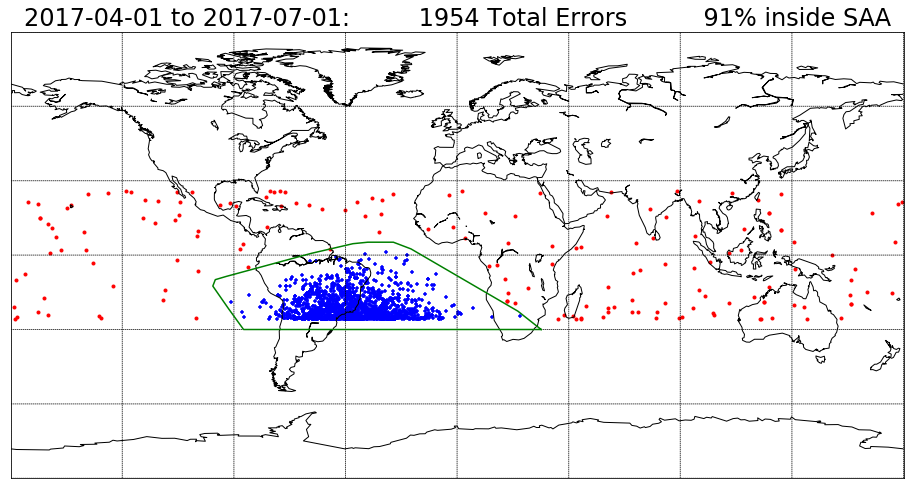

In [6]:
saapercent = 100*len(lat_in)/period_err

saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,45.))
#m.drawmapboundary(fill_color='aqua')
m.plot(saalon,saalat,linewidth=1.5,color='g')
m.scatter(lon_in,lat_in,s=15,marker='+',color='b')
m.scatter(lon_out,lat_out,s=9,marker='o',color='r')
plt.title("%s to %s:         %s Total Errors          %d%% inside SAA" % (start,end,period_err,saapercent))
plt.show()